**Setting up Kaggle API access by creating the required folder and moving the authentication file.**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


**To download the "dogs-vs-cats" dataset from Kaggle using the Kaggle API.**

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 193MB/s]
100% 1.06G/1.06G [00:07<00:00, 145MB/s]


**To extract the contents of the dogs-vs-cats.zip file so the image dataset can be accessed and used for training.**

In [ ]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

**importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os

**To randomly display 9 images from a folder in a 3×3 grid for quick visualization and verification of the dataset.**

In [ ]:
def show_images_from_folder(directory_path , classname=" ",num_img=9):
  image_files=os.listdir(directory_path)

  if len(image_files)<num_img:
    num_img=len(image_files)

  selected=random.sample(image_files,num_img)

  fig,ax=plt.subplots(3,3,figsize=(8,8))
  ax=ax.ravel()

  for i, filename in enumerate(selected):
        img_path = os.path.join(directory_path, filename)
        image=load_img(img_path)
        ax[i].imshow(image)
        ax[i].axis('off')
        ax[i].set_title(classname)
  plt.tight_layout()
  plt.show()


**To display 9 random images of dogs from the training dataset to visually confirm image quality and class correctness.**

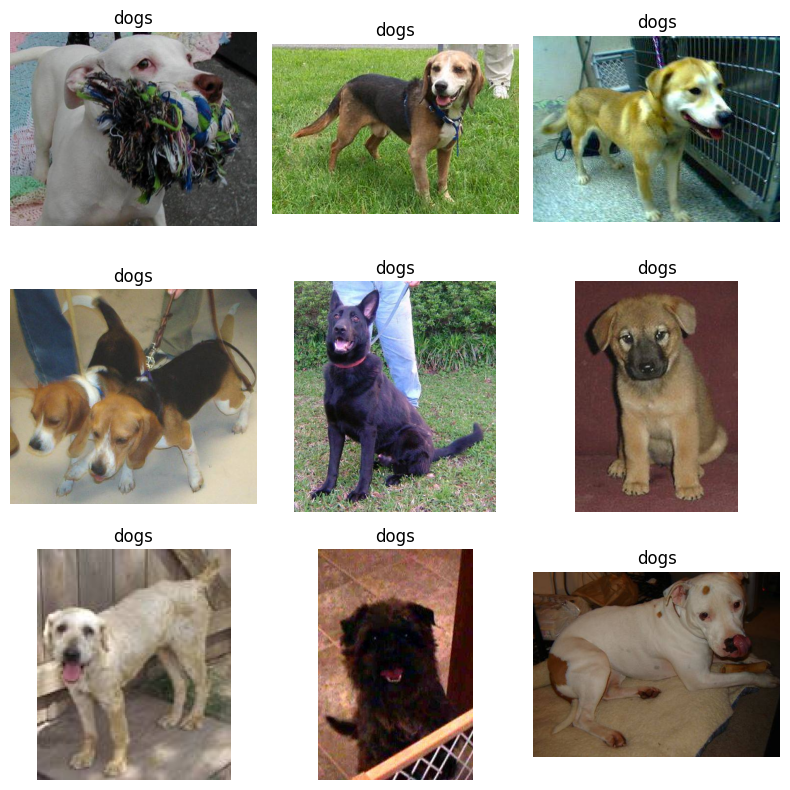

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
show_images_from_folder('/content/dogs_vs_cats/train/dogs', 'dogs')


**To display 9 random images of cats from the training dataset to visually confirm image quality and class correctness.**

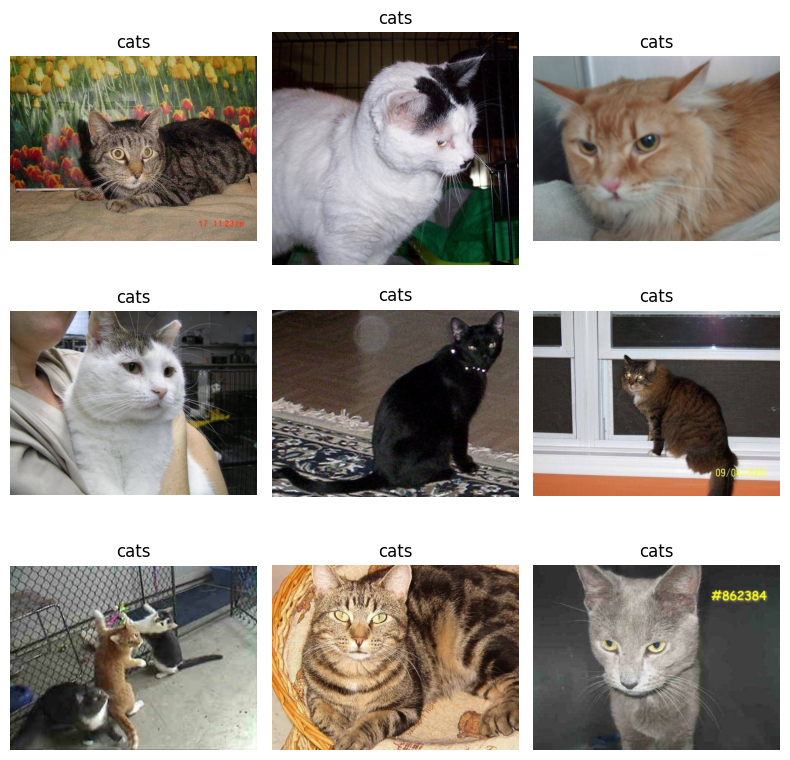

In [ ]:
show_images_from_folder('/content/dogs_vs_cats/train/cats', 'cats')


**To remove all non-image files (not .jpg, .jpeg, or .png) from the dataset folder to prevent errors during model training.**

In [ ]:
import os

def clean_folder(folder_path, allowed_exts={'jpg', 'jpeg', 'png'}):
    removed = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            ext = file.split('.')[-1].lower()
            if ext not in allowed_exts:
                os.remove(os.path.join(root, file))
                removed += 1
    print(f"Removed {removed} unsupported files.")


clean_folder('/content/dogs_vs_cats')


Removed 0 unsupported files.


**To define the base directory path where the dataset (cats and dogs images) is stored for easy access in later steps**

In [ ]:
base_dir='/content/dogs_vs_cats'

**To load and preprocess training and validation images by rescaling pixel values (normalization) and organizing them into batches for training a binary classification model.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255)
val_gen=ImageDataGenerator(rescale=1./255)

train_data=train_gen.flow_from_directory(base_dir, target_size=(150,150),batch_size=32,class_mode="binary")
val_data=val_gen.flow_from_directory(base_dir,target_size=(150,150),batch_size=32,class_mode="binary")

Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


**To import necessary TensorFlow and Keras modules for building a Convolutional Neural Network (CNN), including layers like convolution, pooling, dropout, batch normalization, and dense layers.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Conv2D,Dropout,BatchNormalization


**To build a CNN model with batch normalization and dropout for accurate and stable binary image classification.**

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid') ])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**To compile the model by setting the optimizer, loss function, and evaluation metric for binary classification.**

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"])

**To display a summary of the model architecture, including each layer's type, output shape, and number of trainable parameters.**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,102,913 (72.87 MB)

 Trainable params: 19,101,185 (72.87 MB)

 Non-trainable params: 1,728 (6.75 KB)

**To train the model on training data for 15 epochs and evaluate its performance on validation data during training.**

In [ ]:
history=model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 111ms/step - accuracy: 0.6754 - loss: 0.7045 - val_accuracy: 0.8000 - val_loss: 0.5079
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.7976 - loss: 0.5183 - val_accuracy: 0.8000 - val_loss: 0.5062
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.8006 - loss: 0.5092 - val_accuracy: 0.8000 - val_loss: 0.4998
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.7968 - loss: 0.5099 - val_accuracy: 0.8000 - val_loss: 0.4997
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.8021 - loss: 0.5009 - val_accuracy: 0.8000 - val_loss: 0.4985
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.8037 - loss: 0.4973 - val_accuracy: 0.8000 - val_loss: 0.5029
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.7940 - loss: 0.5097 - val_accuracy: 0.7992 - val_loss: 0.5050
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.7978 - loss: 0.5037 - val

**To visualize the training and validation accuracy over epochs, helping to understand model performance and detect overfitting or underfitting.**

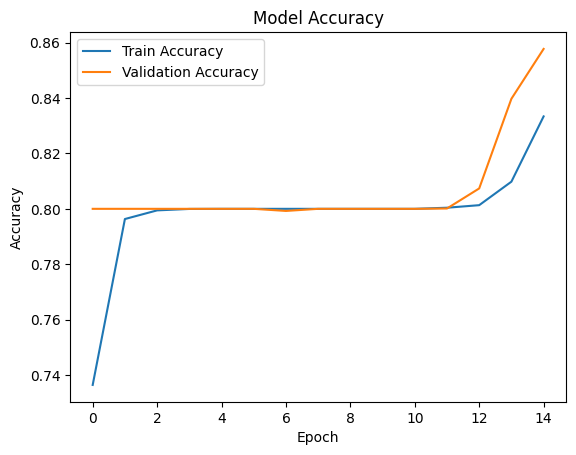

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**To plot training and validation loss over epochs, helping to monitor how well the model is learning and identify signs of overfitting or poor learning.**

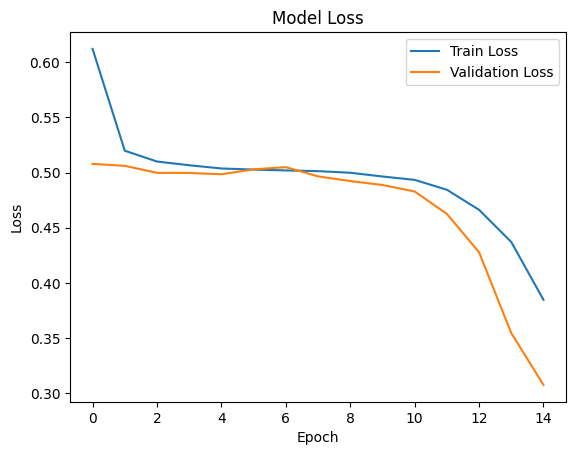

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("cat_dog_model.h5")


In [ ]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
st.title("Cat and Dog Classification")

2025-06-26 13:32:53.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:32:53.633 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:32:53.634 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [ ]:
def load_my_model():
  return load_model('/content/cat_dog_model.h5')

In [ ]:
model=load_my_model
model

<function __main__.load_my_model()>

In [ ]:
# Install required packages
!pip install streamlit pyngrok --quiet

# Write your Streamlit app to a file
import streamlit as st
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

st.title("Cat vs Dog Classifier")

@st.cache_resource
def load_my_model():
    return load_model("cat_dog_model.h5")

model = load_my_model()

uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    image = Image.open(uploaded_file).resize((150, 150))
    st.image(image, caption='Uploaded Image', use_column_width=True)

    img_array = img_to_array(image) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Dog " if prediction > 0.5 else "Cat "
    confidence = prediction if prediction > 0.5 else 1 - prediction

    st.markdown(f"### Prediction: `{label}`")
    st.markdown(f"### Confidence: `{confidence * 100:.2f}%`")


2025-06-26 13:39:23.524 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:39:23.524 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:39:23.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:39:23.527 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:39:23.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:39:23.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:39:23.529 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 13:39:23.534 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar